In [53]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

In [54]:
data_amp = pd.read_csv('MPA_sub_out_2004-2023_annuel.csv')
data_all = pd.read_csv('substrat_out_1987-2023-annuel.csv')
data_atpp = pd.read_csv('ATPP_sub_out_1991-2023_annuel.csv')

In [55]:
data_amp.drop(columns=['Mud'], inplace=True)

In [56]:
# rename date column
data_amp.rename(columns={'YearSeason': 'Date'}, inplace=True)
data_all.rename(columns={'YearSeason': 'Date'}, inplace=True)

In [57]:
# convert date columns to the same format
data_amp['Date'] = pd.to_datetime(data_amp['Date']).dt.to_period('M').dt.to_timestamp()
data_all['Date'] = pd.to_datetime(data_all['Date']).dt.to_period('M').dt.to_timestamp()
data_atpp['Date'] = pd.to_datetime(data_atpp['Date']).dt.to_period('M').dt.to_timestamp()

In [58]:
# merge dataframes
data = pd.merge(data_amp, data_all, on='Date', how='outer')
data = pd.merge(data, data_atpp, on='Date', how='outer')

In [59]:
data_amp = data_amp.set_index('Date')
data_all = data_all.set_index('Date')
data_atpp = data_atpp.set_index('Date')

In [60]:
data.set_index('Date', inplace=True)
data.index = pd.to_datetime(data.index)

In [61]:
# replace all _x named columns with _amp, _y with _all
data.columns = data.columns.str.replace('_x', '_amp')
data.columns = data.columns.str.replace('_y', '_all')

In [62]:
data

,Algae_amp,Dead Coral,Live Coral_amp,Others_amp,Pavement_amp,Rubble_amp,Sand_amp,Turf_amp,Algae_all,Calcified Algae_amp,...,Sand_all,Turf_all,Live Coral,Algae,Turf,Calcified Algae_all,Others,Pavement,Rubble,Sand
Date,,,,,,,,,,,,,,,,,,,,,
2004-10-01,0.006667,0.006667,0.493333,0.0,0.300000,0.160000,0.033333,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-03-01,0.000000,0.033333,0.436733,0.0,0.382600,0.140667,0.006667,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-10-01,0.026667,0.046667,0.420000,0.0,0.360000,0.126667,0.020000,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-03-01,0.000000,0.046667,0.506667,0.0,0.306667,0.133333,0.006667,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-10-01,0.006667,0.013333,0.486667,0.0,0.380000,0.106667,0.006667,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.4675,0.0425,0.2275,0.0975,0.0000,0.0000,0.1275,0.0375
2020-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.3600,0.0700,0.2550,0.1725,0.0025,0.0000,0.1225,0.0175
2021-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.2825,0.0425,0.3900,0.1400,0.0000,0.0025,0.1225,0.0200


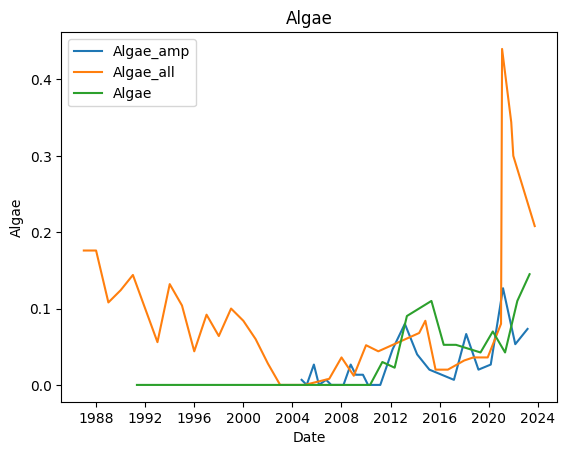

In [63]:
set_columns = ['Algae_amp', 'Algae_all', 'Algae']

# plot set of columns
plt.figure()
plt.title('Algae')
plt.xlabel('Date')
plt.ylabel('Algae')
plt.plot(data[set_columns], label=set_columns)
plt.legend()

In [64]:
data.columns

Index(['Algae_amp', 'Dead Coral', 'Live Coral_amp', 'Others_amp',
       'Pavement_amp', 'Rubble_amp', 'Sand_amp', 'Turf_amp', 'Algae_all',
       'Calcified Algae_amp', 'Live Coral_all', 'Others_all', 'Pavement_all',
       'Rubble_all', 'Sand_all', 'Turf_all', 'Live Coral', 'Algae', 'Turf',
       'Calcified Algae_all', 'Others', 'Pavement', 'Rubble', 'Sand'],
      dtype='object')

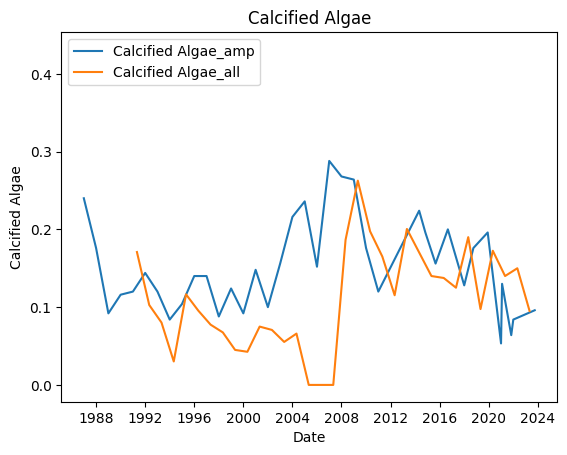

In [65]:
set_columns = ['Calcified Algae_amp', 'Calcified Algae_all']

# plot set of columns
plt.figure()
plt.title('Calcified Algae')
plt.xlabel('Date')
plt.ylabel('Calcified Algae')
plt.plot(data[set_columns], label=set_columns)
plt.legend()


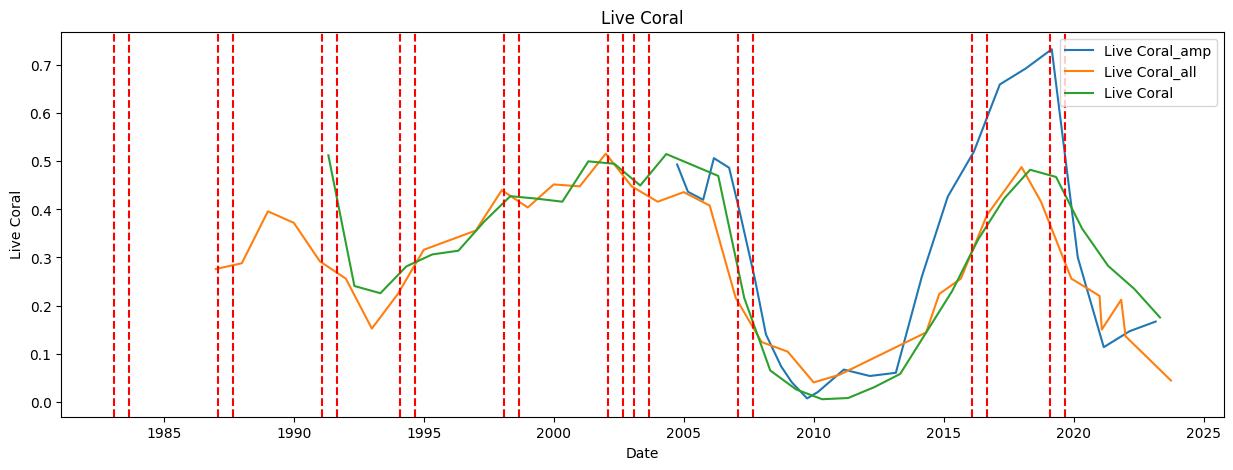

In [66]:
set_columns = ['Live Coral_amp', 'Live Coral_all', 'Live Coral']

# plot set of columns
plt.figure(figsize=(15,5))
plt.title('Live Coral')
plt.xlabel('Date')
plt.ylabel('Live Coral')
plt.plot(data[set_columns], label=set_columns)
plt.legend()

# bleaching events list
list_bleaching = ['1983-02', '1983-09', '1987-02', '1987-09','1991-02', '1991-09', '1994-02', '1994-09', '1998-02', '1998-09', '2002-02', '2002-09', '2003-02', '2003-09', '2007-02', '2007-09', '2016-02', '2016-09', '2019-02', '2019-09']

list_bleaching = pd.to_datetime(list_bleaching)

# add vertical lines for bleaching events
for i in list_bleaching:
    plt.axvline(x=i, color='r', linestyle='--')

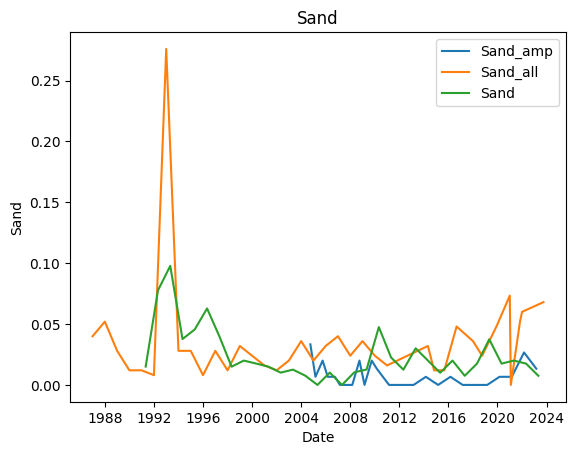

In [67]:
# for sand
set_columns = ['Sand_amp', 'Sand_all', 'Sand']

# plot set of columns
plt.figure()
plt.title('Sand')
plt.xlabel('Date')
plt.ylabel('Sand')
plt.plot(data[set_columns], label=set_columns)
plt.legend()

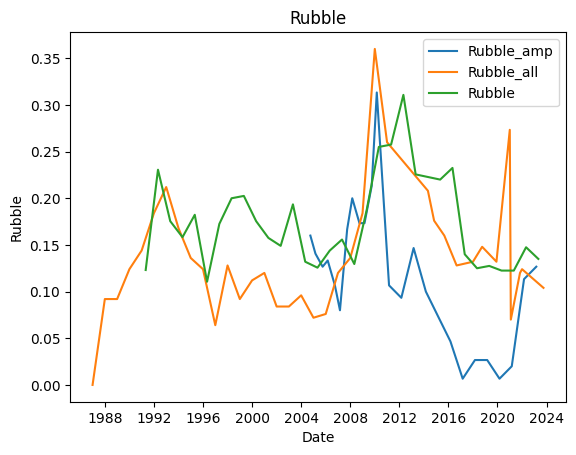

In [68]:
# for rubble
set_columns = ['Rubble_amp', 'Rubble_all', 'Rubble']

# plot set of columns
plt.figure()
plt.title('Rubble')
plt.xlabel('Date')
plt.ylabel('Rubble')
plt.plot(data[set_columns], label=set_columns)
plt.legend()


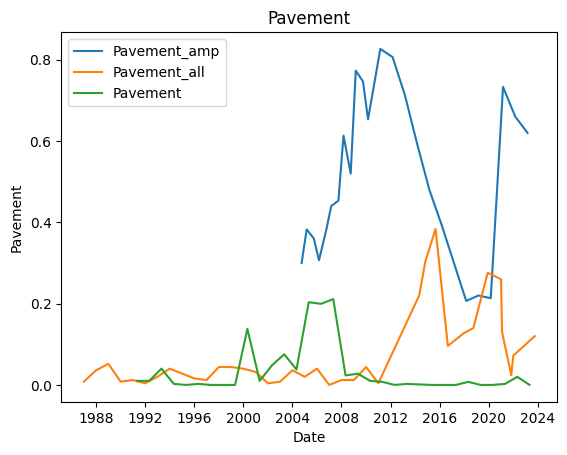

In [69]:
# for pavement
set_columns = ['Pavement_amp', 'Pavement_all', 'Pavement']

# plot set of columns
plt.figure()
plt.title('Pavement')
plt.xlabel('Date')
plt.ylabel('Pavement')
plt.plot(data[set_columns], label=set_columns)
plt.legend()

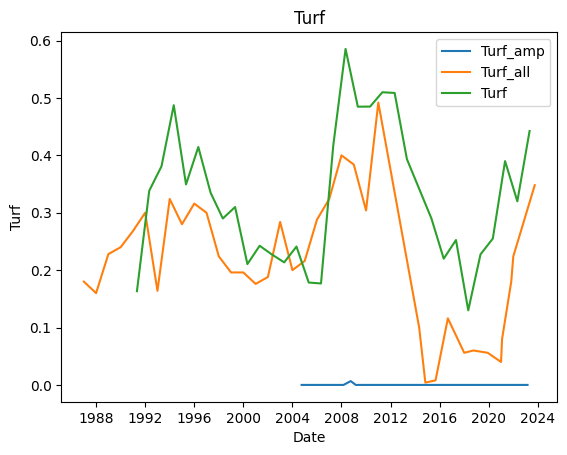

In [70]:
# for turf
set_columns = ['Turf_amp', 'Turf_all', 'Turf']

# plot set of columns
plt.figure()
plt.title('Turf')
plt.xlabel('Date')
plt.ylabel('Turf')
plt.plot(data[set_columns], label=set_columns)
plt.legend()

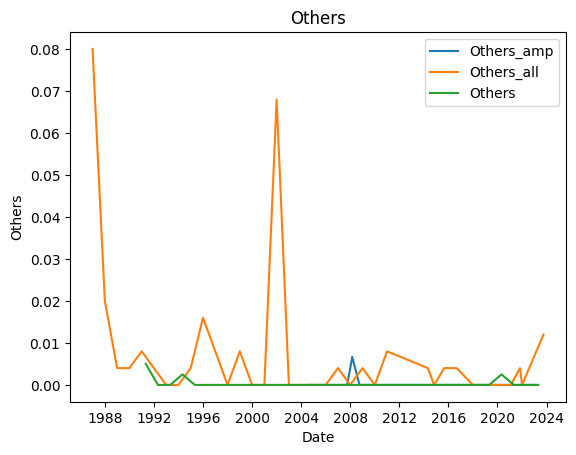

In [71]:
# for Others
set_columns = ['Others_amp', 'Others_all', 'Others']

# plot set of columns
plt.figure()
plt.title('Others')
plt.xlabel('Date')
plt.ylabel('Others')
plt.plot(data[set_columns], label=set_columns)
plt.legend()

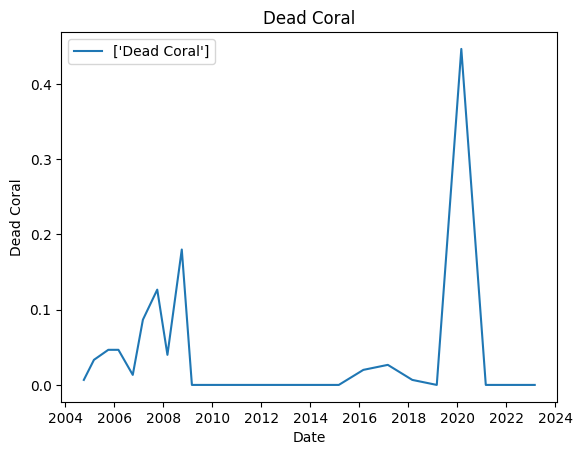

In [72]:
# plot Dead Coral
set_columns = ['Dead Coral']

# plot set of columns
plt.figure()
plt.title('Dead Coral')
plt.xlabel('Date')
plt.ylabel('Dead Coral')
plt.plot(data[set_columns], label=set_columns)
plt.legend()

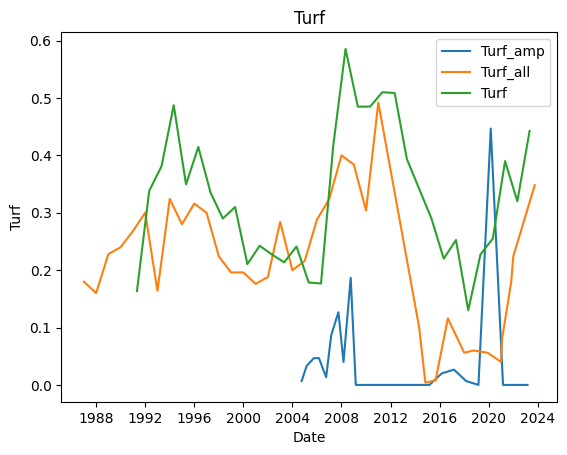

In [73]:
# add dead coral to turf amp and compare again the turf columns
data['Turf_amp'] = data['Turf_amp'] + data['Dead Coral']

# for turf
set_columns = ['Turf_amp', 'Turf_all', 'Turf']

# plot set of columns
plt.figure()
plt.title('Turf')
plt.xlabel('Date')
plt.ylabel('Turf')
plt.plot(data[set_columns], label=set_columns)
plt.legend()

(0.0, 8.0)

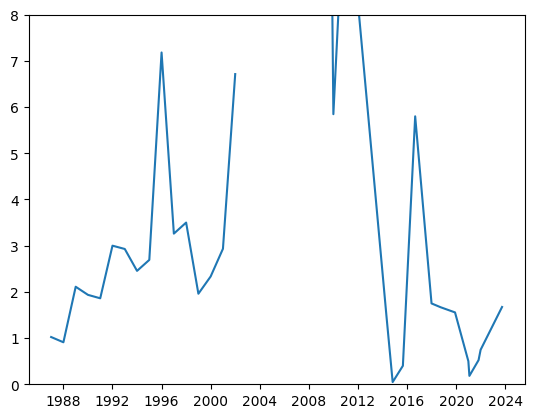

In [74]:
plt.plot(data.index, data['Turf_all'] / data['Algae_all'])
plt.ylim(0, 8)

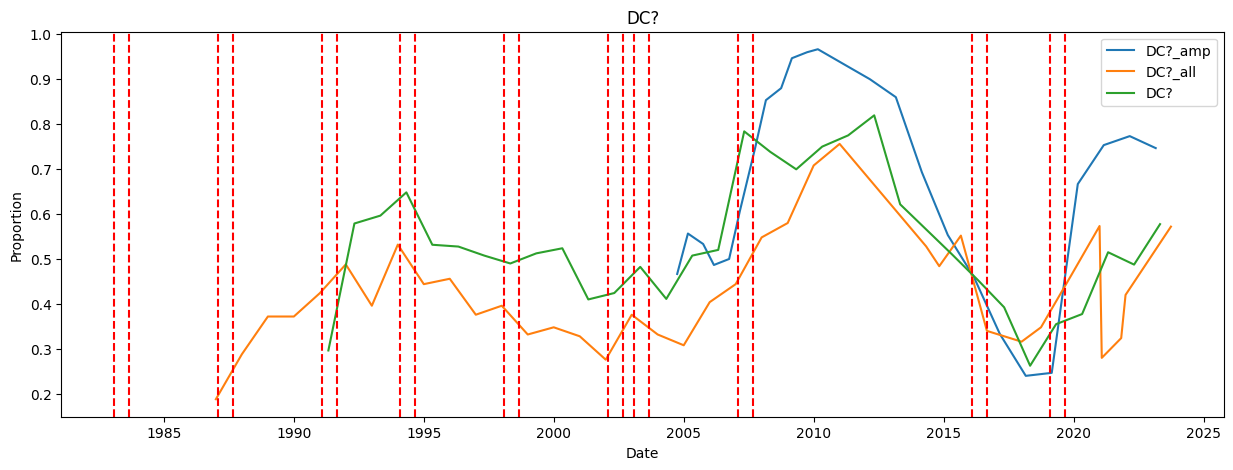

In [75]:
# compute a mineral column adding sand, rubble and pavement for each dataset
data['DC?'] = data['Rubble'] + data['Pavement'] + data['Turf']
data['DC?_amp'] = data['Rubble_amp'] + data['Pavement_amp'] + data['Turf_amp']
data['DC?_all'] = data['Rubble_all'] + data['Pavement_all'] + data['Turf_all']


# for mineral
set_columns = ['DC?_amp', 'DC?_all', 'DC?']

# plot set of columns
plt.figure(figsize=(15,5))
plt.title('DC?')
plt.xlabel('Date')
plt.ylabel('Proportion')
plt.plot(data[set_columns], label=set_columns)
plt.legend()

# bleaching events list
list_bleaching = ['1983-02', '1983-09', '1987-02', '1987-09','1991-02', '1991-09', '1994-02', '1994-09', '1998-02', '1998-09', '2002-02', '2002-09', '2003-02', '2003-09', '2007-02', '2007-09', '2016-02', '2016-09', '2019-02', '2019-09']

list_bleaching = pd.to_datetime(list_bleaching)

# add vertical lines for bleaching events
for i in list_bleaching:
    plt.axvline(x=i, color='r', linestyle='--')


In [76]:
# # create alt_death rate column for each dataset, equals to the difference between this year's live coral and last year's live coral, divided by last year's live coral
# def compute_death_rate(column):
#     death_rate = []
#     death_rate.append(np.nan)
#     for i in range(1, len(column)):
#         if np.isnan(column[i-1]):
#             death_rate.append(np.nan)
#         else :
#             death_rate.append(column[i-1] - column[i])
#     return death_rate 

# data['Alt_death_rate'] = compute_death_rate(data['Live Coral'])
# data['Alt_death_rate_amp'] = compute_death_rate(data['Live Coral_amp'])
# data['Alt_death_rate_all'] = compute_death_rate(data['Live Coral_all'])

# # for alt_death_rate
# set_columns = ['Alt_death_rate_amp', 'Alt_death_rate_all', 'Alt_death_rate']
# # add column dead coral to alt death rate_amp
# data['Alt_death_rate_amp'] = data['Alt_death_rate_amp'] + data['Dead Coral']

# # plot set of columns
# plt.figure()

# plt.title('Alt_death_rate')
# plt.xlabel('Date')
# plt.ylabel('Alt_death_rate')
# plt.plot(data[set_columns], label=set_columns)
# plt.legend()

# # bleaching events list
# list_bleaching = ['1983-02', '1983-09', '1987-02', '1987-09','1991-02', '1991-09', '1994-02', '1994-09', '1998-02', '1998-09', '2002-02', '2002-09', '2003-02', '2003-09', '2007-02', '2007-09', '2016-02', '2016-09', '2019-02', '2019-09']

# list_bleaching = pd.to_datetime(list_bleaching)

# # add vertical lines for bleaching events
# for i in list_bleaching:
#     plt.axvline(x=i, color='r', linestyle='--')

In [77]:
# # compute the discrete derivative of the alt death rate and add it to the dataframe
# data['Alt_death_rate_derivative'] = data['Alt_death_rate'].diff()
# data['Alt_death_rate_derivative_amp'] = data['Alt_death_rate_amp'].diff()
# data['Alt_death_rate_derivative_all'] = data['Alt_death_rate_all'].diff()

# # for alt_death_rate_derivative
# set_columns = ['Alt_death_rate_derivative_amp', 'Alt_death_rate_derivative_all', 'Alt_death_rate_derivative']

# # plot set of columns
# plt.figure()
# plt.title('Alt_death_rate_derivative')
# plt.xlabel('Date')
# plt.ylabel('Alt_death_rate_derivative')
# plt.plot(data[set_columns], label=set_columns)
# plt.legend()

# # add vertical lines for bleaching events
# for i in list_bleaching:
#     plt.axvline(x=i, color='r', linestyle='--')

In [78]:
# data_amp['Alt_death_rate_amp'] = compute_death_rate(data_amp['Live Coral'])
# data_all['Alt_death_rate_all'] = compute_death_rate(data_all['Live Coral'])
# data_atpp['Alt_death_rate'] = compute_death_rate(data_atpp['Live Coral'])

In [79]:
# data_amp['Alt_death_rate_derivative_amp'] = data_amp['Alt_death_rate_amp'].diff()
# data_all['Alt_death_rate_derivative_all'] = data_all['Alt_death_rate_all'].diff()
# data_atpp['Alt_death_rate_derivative'] = data_atpp['Alt_death_rate'].diff()

In [80]:
# # correlation matrix
# data_amp.corr()

In [81]:
# data_all.corr()

In [82]:
# data_atpp.corr()

In [83]:
# define a cross correlation function
def crosscorr(datax, datay, lag=0):
    """ Lag-N cross correlation. 
    Shifted data filled with NaNs 
    
    Parameters
    ----------
    lag : int, default 0
    datax, datay : pandas.Series objects of equal length
    
    Returns
    ----------
    crosscorr : float
    """
    return datax.corr(datay.shift(lag))

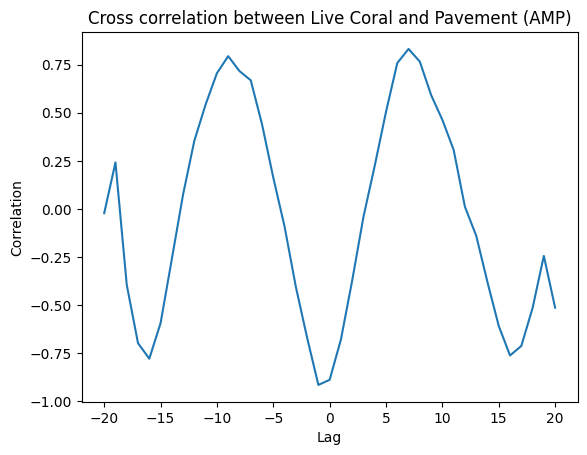

In [84]:
col = 'Pavement'
max_lag = 20
lags = range(-max_lag,max_lag+1)
rs = [crosscorr(data_amp['Live Coral'],data_amp[col], lag) for lag in lags]
plt.figure()
plt.title(f'Cross correlation between Live Coral and {col} (AMP)')
plt.xlabel('Lag')
plt.ylabel('Correlation')
plt.plot(lags, rs)



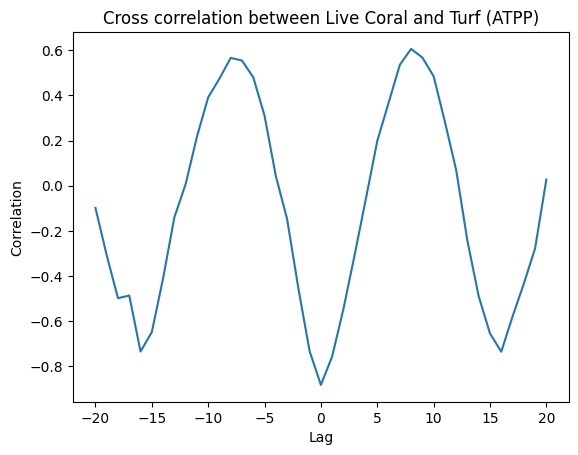

In [85]:
col = 'Turf'
max_lag = 20
lags = range(-max_lag,max_lag+1)
rs = [crosscorr(data_atpp['Live Coral'],data_atpp[col], lag) for lag in lags]
plt.figure()
plt.title(f'Cross correlation between Live Coral and {col} (ATPP)')
plt.xlabel('Lag')
plt.ylabel('Correlation')
plt.plot(lags, rs)


In [86]:
data.columns

Index(['Algae_amp', 'Dead Coral', 'Live Coral_amp', 'Others_amp',
       'Pavement_amp', 'Rubble_amp', 'Sand_amp', 'Turf_amp', 'Algae_all',
       'Calcified Algae_amp', 'Live Coral_all', 'Others_all', 'Pavement_all',
       'Rubble_all', 'Sand_all', 'Turf_all', 'Live Coral', 'Algae', 'Turf',
       'Calcified Algae_all', 'Others', 'Pavement', 'Rubble', 'Sand', 'DC?',
       'DC?_amp', 'DC?_all'],
      dtype='object')

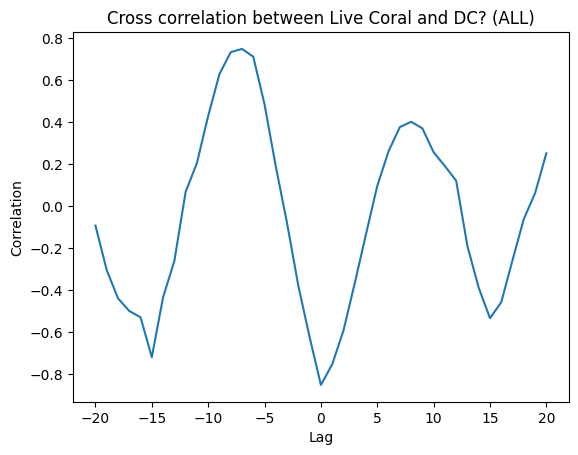

In [87]:
col = 'DC?'
max_lag = 20
lags = range(-max_lag,max_lag+1)
rs = [crosscorr(data['Live Coral'], data[col], lag) for lag in lags]
plt.figure()
plt.title(f'Cross correlation between Live Coral and {col} (ALL)')
plt.xlabel('Lag')
plt.ylabel('Correlation')
plt.plot(lags, rs)


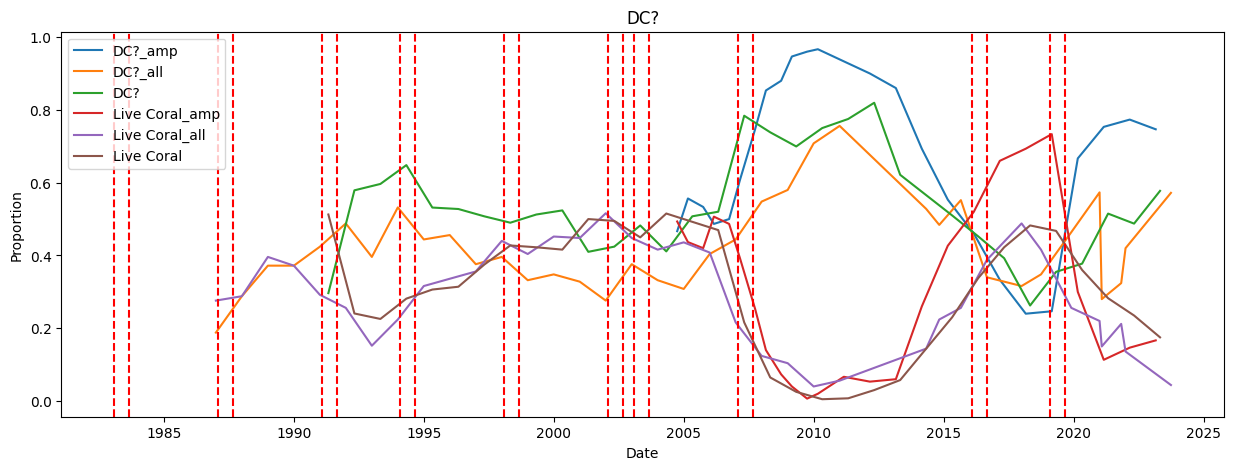

In [88]:
# plot DC? and Live Coral
set_columns = ['DC?_amp', 'DC?_all', 'DC?']

# plot set of columns
plt.figure(figsize=(15,5))
plt.title('DC?')
plt.xlabel('Date')
plt.ylabel('Proportion')
plt.plot(data[set_columns], label=set_columns)

# plot Live Coral
set_columns = ['Live Coral_amp', 'Live Coral_all', 'Live Coral']

# plot set of columns
plt.plot(data[set_columns], label=set_columns)
plt.legend()

# add vertical lines for bleaching events
for i in list_bleaching:
    plt.axvline(x=i, color='r', linestyle='--')



In [89]:
data_up = data.copy()

In [90]:
categories = ['Algae', 'Calcified Algae', 'Live Coral', 'Sand', 'Rubble', 'Pavement', 'Turf', 'Others', 'Dead Coral', 'DC?']

A = ['Algae', 'Algae_amp', 'Algae_all']
CA = ['Calcified Algae_amp', 'Calcified Algae_all']
LC = ['Live Coral', 'Live Coral_amp', 'Live Coral_all']
O = ['Others', 'Others_amp', 'Others_all']
DC = ['DC?', 'DC?_amp', 'DC?_all']


In [91]:
# create columns for each category, equals to the mean of the columns of the category
data_up['A'] = data_up[A].mean(axis=1)
data_up['CA'] = data_up[CA].mean(axis=1)
data_up['LC'] = data_up[LC].mean(axis=1)
data_up['O'] = data_up[O].mean(axis=1)
data_up['DC'] = data_up[DC].mean(axis=1)

data_up.drop(columns=['Algae_amp', 'Dead Coral', 'Live Coral_amp', 'Others_amp',
       'Pavement_amp', 'Rubble_amp', 'Sand_amp', 'Turf_amp', 'Algae_all',
       'Calcified Algae_amp', 'Live Coral_all', 'Others_all', 'Pavement_all',
       'Rubble_all', 'Sand_all', 'Turf_all', 'Live Coral', 'Algae', 'Turf',
       'Calcified Algae_all', 'Others', 'Pavement', 'Rubble', 'Sand', 'DC?',
       'DC?_amp', 'DC?_all'], inplace=True)

In [92]:
# sort values
data_up.sort_values(by=['Date'], inplace=True)

In [93]:
data_up.interpolate(method='time', inplace=True)

In [94]:
data_up.fillna(0, inplace=True)

<Axes: xlabel='Date'>

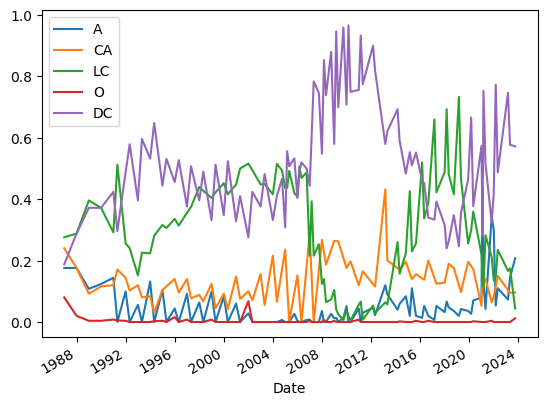

In [95]:
data_up.plot()

(-1.0, 1.0)

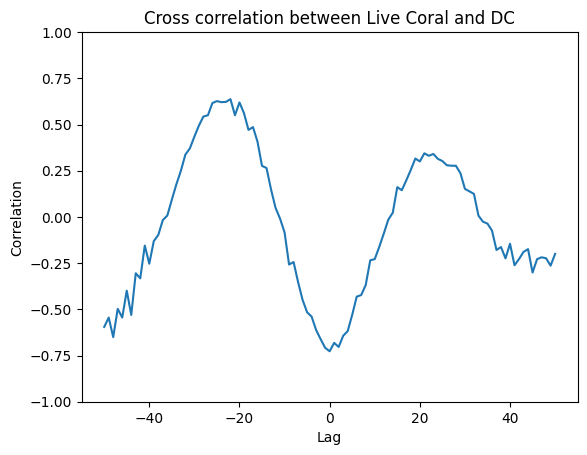

In [96]:
# cross correlation between DC and LC
col = 'DC'
max_lag = 50
lags = range(-max_lag,max_lag+1)
rs = [crosscorr(data_up['LC'], data_up[col], lag) for lag in lags]
plt.figure()
plt.title(f'Cross correlation between Live Coral and {col}')
plt.xlabel('Lag')
plt.ylabel('Correlation')
plt.plot(lags, rs)
plt.ylim(-1,1)


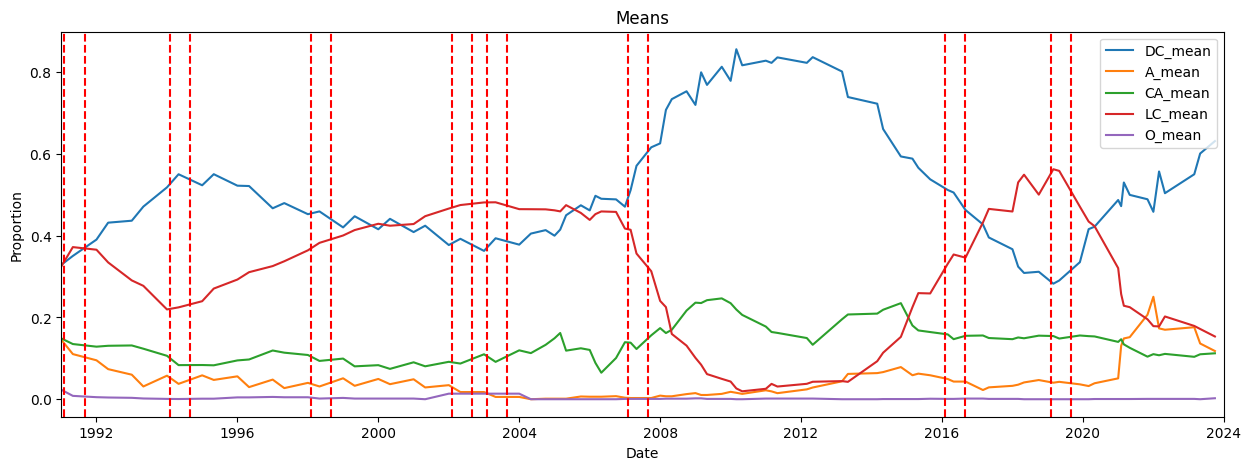

In [97]:
# sliding mean
data_mean = data_up.copy()
data_mean['DC_mean'] = data_mean['DC'].rolling(window=5).mean()
data_mean['A_mean'] = data_mean['A'].rolling(window=5).mean()
data_mean['CA_mean'] = data_mean['CA'].rolling(window=5).mean()
data_mean['LC_mean'] = data_mean['LC'].rolling(window=5).mean()
data_mean['O_mean'] = data_mean['O'].rolling(window=5).mean()

# plot only the means
plt.figure(figsize=(15,5))
plt.title('Means')
plt.xlabel('Date')
plt.ylabel('Proportion')
plt.plot(data_mean[['DC_mean', 'A_mean', 'CA_mean', 'LC_mean', 'O_mean']])
plt.legend(['DC_mean', 'A_mean', 'CA_mean', 'LC_mean', 'O_mean'])
plt.xlim(pd.Timestamp('1991-01-01'), pd.Timestamp('2024-01-01'))

# add vertical lines for bleaching events
for i in list_bleaching:
    plt.axvline(x=i, color='r', linestyle='--')


In [98]:
data_mean.corr()

,A,CA,LC,O,DC,DC_mean,A_mean,CA_mean,LC_mean,O_mean
A,1.000000,-0.035505,-0.232844,0.188268,-0.283520,-0.047557,0.720516,-0.063197,-0.209743,-0.032575
CA,-0.035505,1.000000,-0.350444,0.086523,0.128162,0.366074,-0.160559,0.679060,-0.325863,-0.102292
LC,-0.232844,-0.350444,1.000000,0.049753,-0.727103,-0.815769,-0.194341,-0.505055,0.888944,0.172038
O,0.188268,0.086523,0.049753,1.000000,-0.278256,-0.092833,0.037031,-0.145447,0.066575,0.385598
DC,-0.283520,0.128162,-0.727103,-0.278256,1.000000,0.841132,-0.134974,0.443745,-0.732407,-0.230767
DC_mean,-0.047557,0.366074,-0.815769,-0.092833,0.841132,1.000000,-0.127851,0.579095,-0.911350,-0.283133
A_mean,0.720516,-0.160559,-0.194341,0.037031,-0.134974,-0.127851,1.000000,-0.178669,-0.227608,0.047614
CA_mean,-0.063197,0.679060,-0.505055,-0.145447,0.443745,0.579095,-0.178669,1.000000,-0.546276,-0.224526
LC_mean,-0.209743,-0.325863,0.888944,0.066575,-0.732407,-0.911350,-0.227608,-0.546276,1.000000,0.193089
O_mean,-0.032575,-0.102292,0.172038,0.385598,-0.230767,-0.283133,0.047614,-0.224526,0.193089,1.000000


In [99]:
data_mean = data_mean.drop(columns=['DC', 'A', 'CA', 'LC', 'O'])

In [100]:
data_mean.to_csv('FINAL_sub_mean.csv')

In [101]:
# compute the mean time intervall for a lag
lag_val = int((data.index.max() - data.index.min()).days) / len(data) / 365
20*lag_val


7.823958029728942

(-1.0, 1.0)

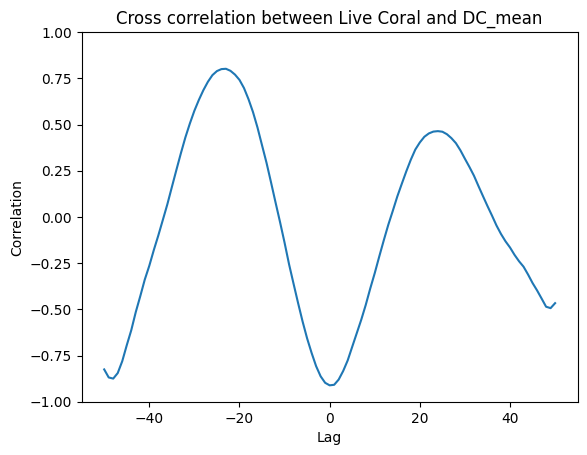

In [102]:
# cross correlation between DC and LC
col = 'DC_mean'
max_lag = 50
lags = range(-max_lag,max_lag+1)
rs = [crosscorr(data_mean['LC_mean'], data_mean[col], lag) for lag in lags]
plt.figure()
plt.title(f'Cross correlation between Live Coral and {col}')
plt.xlabel('Lag')
plt.ylabel('Correlation')
plt.plot(lags, rs)
plt.ylim(-1,1)


(-1.0, 1.0)

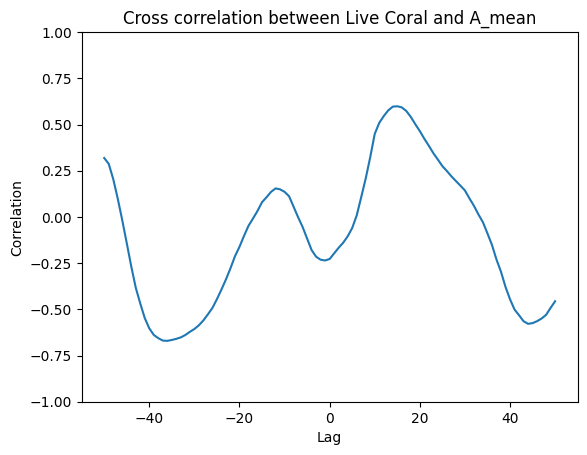

In [103]:
# cross correlation between DC and LC
col = 'A_mean'
max_lag = 50
lags = range(-max_lag,max_lag+1)
rs = [crosscorr(data_mean['LC_mean'], data_mean[col], lag) for lag in lags]
plt.figure()
plt.title(f'Cross correlation between Live Coral and {col}')
plt.xlabel('Lag')
plt.ylabel('Correlation')
plt.plot(lags, rs)
plt.ylim(-1,1)

### Shannon

In [104]:
data_org = pd.read_csv('../MPA_org_out_2006-2020_annuel.csv')

FileNotFoundError: [Errno 2] No such file or directory: '../MPA_org_out_2006-2020_annuel.csv'

In [ ]:
data_pmana = pd.read_csv('../corail/Pmana_corail_shannon.csv')

In [ ]:
data_pmana.set_index('Year', inplace=True)
data_pmana.index = pd.to_datetime(data_pmana.index)

In [ ]:
data_org.set_index('Date', inplace=True)
data_org.index = pd.to_datetime(data_org.index)

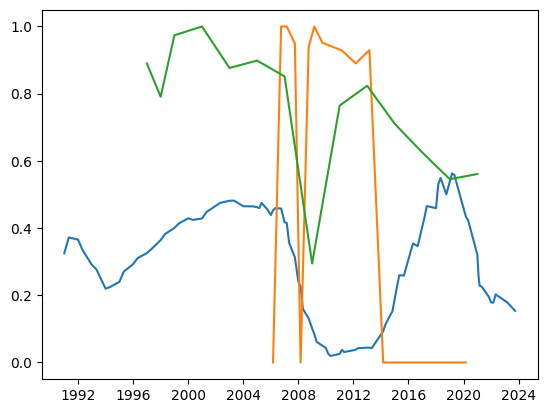

In [ ]:
plt.plot(data_mean['LC_mean'])
plt.plot(data_org['Shannon'])
plt.plot(data_pmana['Shannon'])